In [31]:
import tensorflow as tf
#import tensorflow_datasets as tfds
from keras.models import load_model  # TensorFlow is required for Keras to work
import cv2  # Install opencv-python
import numpy as np
import matplotlib.pyplot as plt

# Disable scientific notation for clarity
np.set_printoptions(suppress=True)

# Load the model
model = load_model("model.savedmodel", compile=False)

# Load the labels
class_names = open("labels.txt", "r").readlines()
# Create the array of the right shape to feed into the keras model
# The 'length' or number of images you can put into the array is
# determined by the first position in the shape tuple, in this case 1
data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)

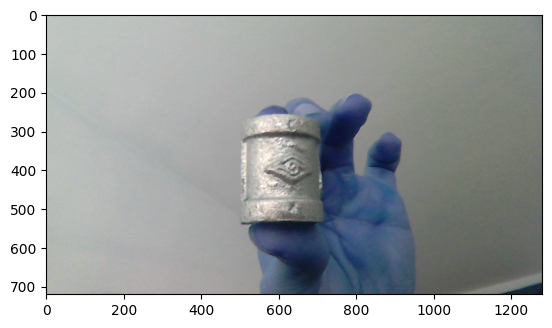

In [32]:
imagen_test = cv2.imread('test1.jpg')
#cv2.imshow("Webcam Image", imagen_test)
plt.imshow(imagen_test)

In [33]:
# resize the image
TAMANO_IMG=224
imagen_test = cv2.resize(imagen_test, (TAMANO_IMG, TAMANO_IMG))
image_array = np.asarray(imagen_test)
# turn the image into a numpy array
image_array = np.asarray(image_array)
# Normalize the image
normalized_image_array = (image_array.astype(np.float32) / 127.5) - 1


In [34]:
data[0] = normalized_image_array

# Predicts the model
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)

1/1 [==============================] - 2s 2s/step
Class: Tube
Confidence Score: 0.9996984


In [35]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale= 1. / 255,
    rotation_range = 10,
    width_shift_range=0.15,
    height_shift_range = 0.15,
    shear_range = 5,
    zoom_range = [0.7, 1.3],
    validation_split = 0.2
)

data_gen_entrenamiento = datagen.flow_from_directory("dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="training")

data_gen_pruebas = datagen.flow_from_directory("dataset",
                                                     target_size=(224,224),
                                                     batch_size=32, shuffle=True,
                                                     subset="validation")

Found 646 images belonging to 2 classes.
Found 161 images belonging to 2 classes.


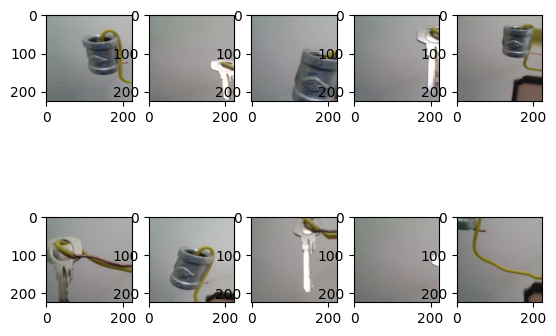

In [37]:
for imagenes, etiquetas in data_gen_entrenamiento:
  for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(imagenes[i])

  break
plt.show()

In [ ]:
import tensorflow_hub as hub
pb_model = 'model.savedmodel'
trained_model = hub.KerasLayer(pb_model, input_shape=(224, 224, 3))

In [ ]:
trained_model.trainable = False
modelo = tf.keras.Sequential([
    trained_model,
    tf.keras.layers.Dense(2, activation="softmax")
])

modelo.compile(
    optimizer="adam",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)
EPOCAS = 20
entrenamiento = modelo.fit(
    data_gen_entrenamiento, epochs=EPOCAS, batch_size=32,
    validation_data=data_gen_pruebas
)

In [ ]:
prediction = model.predict(data)
index = np.argmax(prediction)
class_name = class_names[index]
confidence_score = prediction[0][index]

# Print prediction and confidence score
print("Class:", class_name[2:], end="")
print("Confidence Score:", confidence_score)